In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. /255,
    rotation_range = 30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/archive5/emotion_faces', 
    target_size=(48,48),
    batch_size=32,
    color_mode='grayscale',
    shuffle=True, 
    subset='training'
    )

data_gen_pruebas = datagen.flow_from_directory(
    '/content/drive/MyDrive/GestionProyectos/archive5/emotion_faces',
    target_size=(48,48), 
    batch_size=32, 
    color_mode='grayscale',
    shuffle=True, 
    subset='validation'
    )

Found 10874 images belonging to 7 classes.
Found 2716 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(data_gen_entrenamiento, epochs=100, batch_size=32, validation_data=data_gen_pruebas)

Epoch 1/100
340/340 [==============================] - 35s 79ms/step - loss: 1.9022 - accuracy: 0.1986 - val_loss: 1.8872 - val_accuracy: 0.2139
Epoch 2/100
340/340 [==============================] - 26s 76ms/step - loss: 1.8777 - accuracy: 0.2272 - val_loss: 1.8806 - val_accuracy: 0.2095
Epoch 3/100
340/340 [==============================] - 26s 77ms/step - loss: 1.8721 - accuracy: 0.2277 - val_loss: 1.8704 - val_accuracy: 0.2172
Epoch 4/100
340/340 [==============================] - 26s 78ms/step - loss: 1.8584 - accuracy: 0.2339 - val_loss: 1.8526 - val_accuracy: 0.2327
Epoch 5/100
340/340 [==============================] - 25s 75ms/step - loss: 1.8537 - accuracy: 0.2405 - val_loss: 1.8566 - val_accuracy: 0.2231
Epoch 6/100
340/340 [==============================] - 25s 75ms/step - loss: 1.8492 - accuracy: 0.2403 - val_loss: 1.8303 - val_accuracy: 0.2445
Epoch 7/100
340/340 [==============================] - 25s 75ms/step - loss: 1.8359 - accuracy: 0.2519 - val_loss: 1.8279 - val_ac

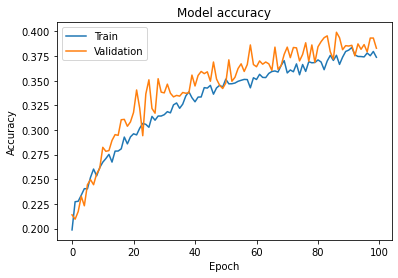

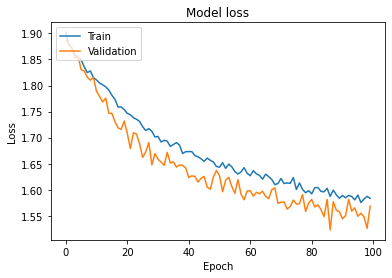

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()